In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib widget

from tqdm.notebook import tqdm

In [4]:
def generate_traj(seq:np.ndarray, maxsteps=100, pad=False):
    lens = []
    M = len(seq)
    i = 0
    while True:
        seq = np.random.choice(seq, size=M, replace=True)
        lens.append(len(set(seq)))
        i += 1
        if lens[-1] == 1 or (maxsteps and i >= maxsteps):
            break
    if pad and maxsteps:
        lens += [1]*(maxsteps - len(lens))

    return lens


In [25]:
N = 1000
maxsteps = 100
repetitions = 1000

ls = []
for i in tqdm(np.arange(repetitions)):
    ls.append(generate_traj(np.arange(N), maxsteps=maxsteps, pad=False))

  0%|          | 0/1000 [00:00<?, ?it/s]

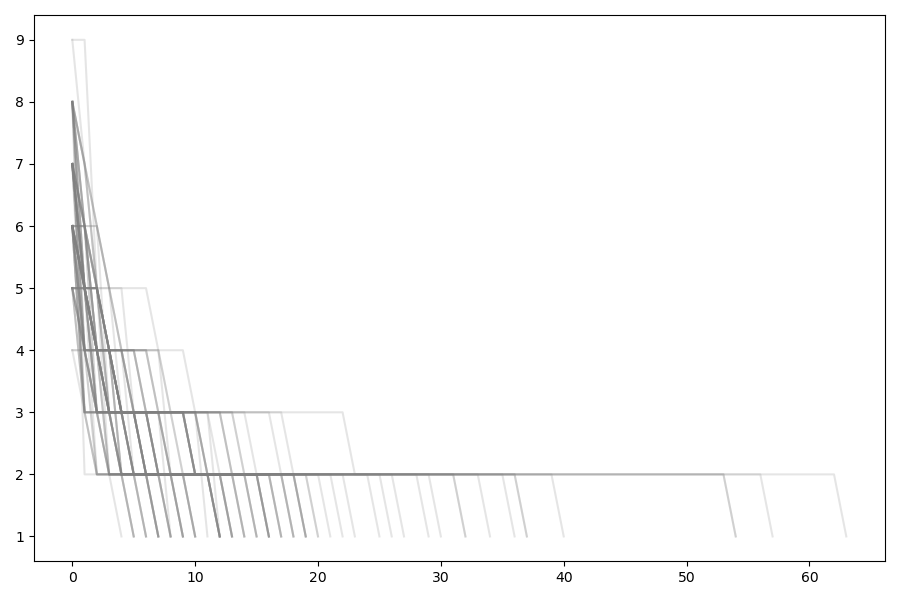

In [6]:
plt.close(1)
fig,ax = plt.subplots(num=1, figsize=(9,6))

for i in range(repetitions):
    plt.plot(ls[i], color='gray', alpha=0.2)

fig.tight_layout()

In [26]:
# pad to maxlen
maxlen = max([len(l) for l in ls])
ls = [l + [1]*(maxlen - len(l)) for l in ls]

In [27]:
hists = []
for j in tqdm(range(maxlen)):
    hists.append(np.histogram([l[j] + 0.5 for l in ls], bins=np.arange(N+1))[0])
hists = np.array(hists)/repetitions

  0%|          | 0/100 [00:00<?, ?it/s]

In [10]:
matplotlib.rc('font', size=18)

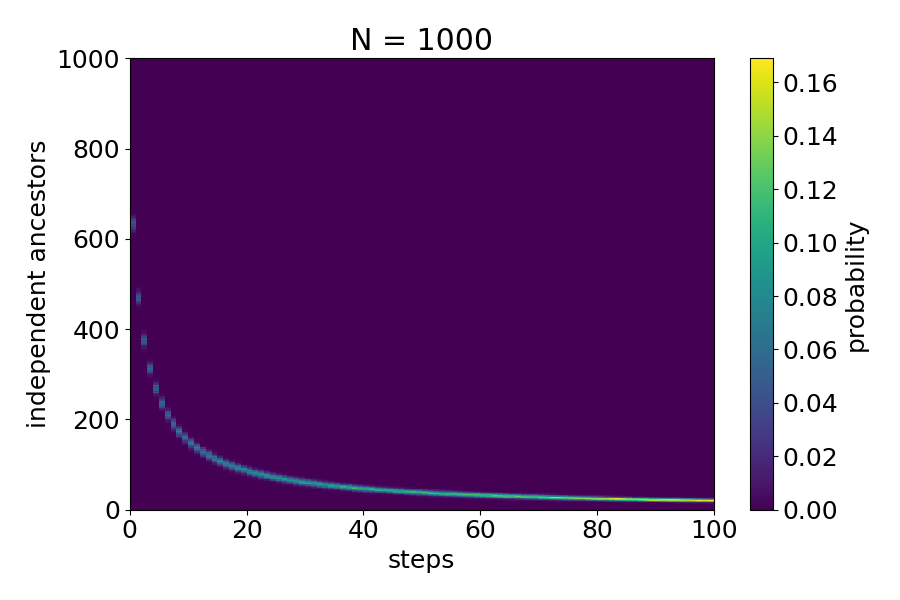

In [28]:
plt.close(2)
fig, ax = plt.subplots(num=2, figsize=(9,6))

plt.pcolormesh(hists.T)
# plt.xlim(0,50)
plt.xlabel('steps')
plt.ylabel('independent ancestors')
plt.colorbar(label='probability')
plt.title(f'{N = }')

fig.tight_layout()